<a href="https://colab.research.google.com/github/merajsiddieque/DS-LAB/blob/main/DS_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/titanic.csv')
df.head()
# df.isnull().sum()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
cumulative_freq = df['class'].value_counts().cumsum()
relative_freq = df['class'].value_counts(normalize=True) * 100
absolute_freq = df['class'].value_counts()

freqtable = pd.DataFrame({
    'Cumulative Frequency': cumulative_freq,
    'Relative Frequency': relative_freq,
    'Absolute Frequency': absolute_freq
})

print(freqtable)

        Cumulative Frequency  Relative Frequency  Absolute Frequency
class                                                               
Third                    491           55.106622                 491
First                    707           24.242424                 216
Second                   891           20.650954                 184


In [4]:
malesurvivedzero = df[(df['survived'] == 0) & (df['sex'] == 'male')]
malesurvivedone = df[(df['survived'] == 1) & (df['sex'] == 'male')]
femalesurvivedzero = df[(df['survived'] == 0) & (df['sex'] == 'female')]
femalesurvivedone = df[(df['survived'] == 1) & (df['sex'] == 'female')]


male_0 = len(malesurvivedzero)
male_1 = len(malesurvivedone)
female_0 = len(femalesurvivedzero)
female_1 = len(femalesurvivedone)
survived0sum = sum([male_0,female_0])
survived1sum = sum([male_1,female_1])

table = pd.DataFrame({
    'Sex': ['Male', 'Female', 'Total'],
    'Survived 0': [male_0, female_0, survived0sum],
    'Survived 1': [male_1, female_1, survived1sum]
})

print(table)

      Sex  Survived 0  Survived 1
0    Male         468         109
1  Female          81         233
2   Total         549         342


In [5]:
df = df.dropna(subset=['sex', 'survived'])
table = pd.crosstab(df['sex'], df['survived'], margins=True)
print(table)

survived    0    1  All
sex                    
female     81  233  314
male      468  109  577
All       549  342  891


In [11]:
joint_prob = table.loc['female', 1] / table.loc['All', 'All']
print(f"Joint Probability P(Sex=female, Survived=1): {joint_prob:.4f}")


Joint Probability P(Sex=female, Survived=1): 0.2615


In [12]:
# P(Sex = female)
marginal_female = table.loc['female', 'All'] / table.loc['All', 'All']
print(f"Marginal Probability P(Sex=female): {marginal_female:.4f}")

# P(Survived = 1)
marginal_survived = table.loc['All', 1] / table.loc['All', 'All']
print(f"Marginal Probability P(Survived=1): {marginal_survived:.4f}")


Marginal Probability P(Sex=female): 0.3524
Marginal Probability P(Survived=1): 0.3838


In [13]:
# P(Survived = 1 | Sex = female)
cond_survived_given_female = table.loc['female', 1] / table.loc['female', 'All']
print(f"Conditional Probability P(Survived=1 | Sex=female): {cond_survived_given_female:.4f}")

# P(Sex = female | Survived = 1)
cond_female_given_survived = table.loc['female', 1] / table.loc['All', 1]
print(f"Conditional Probability P(Sex=female | Survived=1): {cond_female_given_survived:.4f}")


Conditional Probability P(Survived=1 | Sex=female): 0.7420
Conditional Probability P(Sex=female | Survived=1): 0.6813


In [14]:
df_clean = df[['age', 'fare']].dropna()

# Compute Pearson correlation
correlation = df_clean['age'].corr(df_clean['fare'], method='pearson')
print(f"Pearson Correlation between Age and Fare: {correlation:.4f}")


Pearson Correlation between Age and Fare: 0.0961


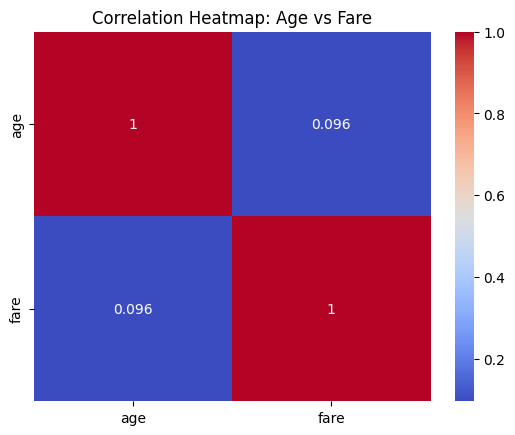

In [15]:
# Correlation matrix
corr_matrix = df_clean.corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Age vs Fare")
plt.show()


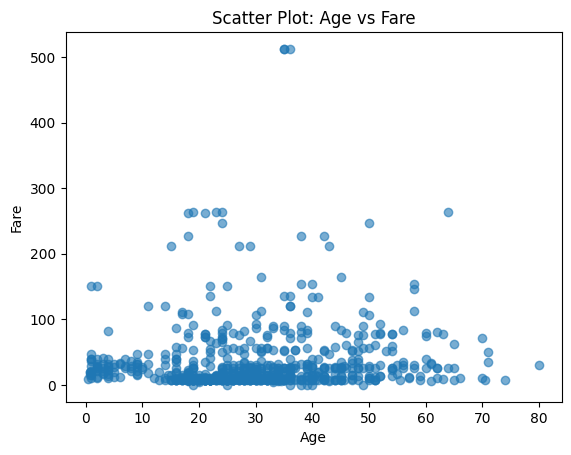

In [19]:
plt.scatter(df_clean['age'], df_clean['fare'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot: Age vs Fare')
plt.show()


In [20]:

# Create a contingency table: class vs survived
survival_by_class = pd.crosstab(df['class'], df['survived'])

# Normalize to get survival rate percentages (optional for insight)
survival_by_class_norm = survival_by_class.div(survival_by_class.sum(axis=1), axis=0)


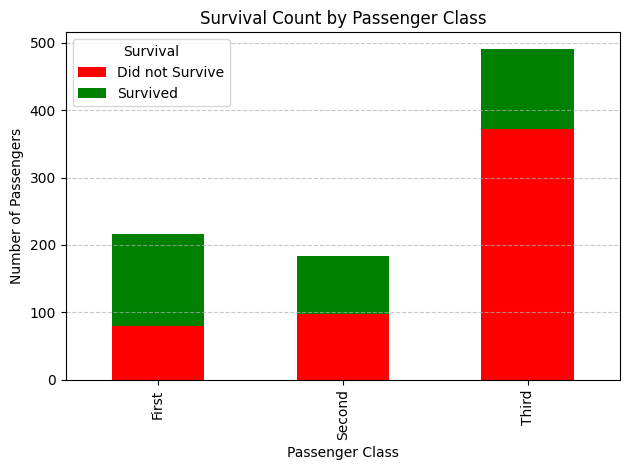

In [21]:
# Stacked bar chart
survival_by_class.plot(kind='bar', stacked=True, color=['red', 'green'])

plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(['Did not Survive', 'Survived'], title='Survival')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
